In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime

In [2]:
symbol = ['RUB=X', 'BZ=F']

In [3]:
brent = pd.read_csv("brent.csv")

brent['Дата'] = pd.to_datetime(brent['Дата'])

brent = brent.sort_values('Дата')                       
brent.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
237,2016-01-02,"34,24","35,85","36,25","33,92","331,87K","-1,44"
216,2016-01-03,"36,81","36,60","37,25","35,95","276,26K","2,34"
194,2016-01-04,"38,67","40,14","40,43","38,55","286,17K","-2,35"
151,2016-01-06,"49,72","49,65","50,00","48,65","266,00K","0,06"
129,2016-01-07,"50,35","49,90","50,66","49,25","248,69K","1,35"


In [4]:
rub = pd.read_csv("USD_RUB.csv")
rub['Дата'] = pd.to_datetime(rub['Дата'])
rub = rub.sort_values('Дата')                       
rub.head()

,Дата,Цена,Откр.,Макс.,Мин.,Изм. %
254,2016-01-01,"73,0000","72,8800","73,0000","72,8800","0,00"
233,2016-01-02,"77,3094","75,4644","77,4449","75,4273","2,44"
212,2016-01-03,"73,3731","75,1682","75,1682","73,1891","-2,39"
190,2016-01-04,"67,5855","67,0288","68,3415","66,9732","0,83"
150,2016-01-06,"67,1015","66,6968","67,3133","66,5300","0,61"


## 2) найти накопленный процент изменения цены пары валют и нефти

In [5]:
brent['Изм. %'] = brent['Изм. %'].str.replace(',', '.')

In [6]:
brent['Изм. %'] = brent['Изм. %'].astype(float)

In [7]:
print ('Brent сумма %: ' , brent['Изм. %'].sum())

Brent сумма %:  52.15999999999997


In [8]:
rub['Изм. %'] = rub['Изм. %'].str.replace(',', '.')
rub['Изм. %'] = rub['Изм. %'].astype(float)
print ('USD/RUB сумма %: ' , rub['Изм. %'].sum())

USD/RUB сумма %:  -15.699999999999994


## 3) построить графики

In [9]:
brent['Цена'] = brent['Цена'].str.replace(',', '.')
brent['Цена'] = brent['Цена'].astype(float)

rub['Цена'] = rub['Цена'].str.replace(',', '.')
rub['Цена'] = rub['Цена'].astype(float)

In [10]:
brent = brent.reset_index()
rub   = rub.reset_index()

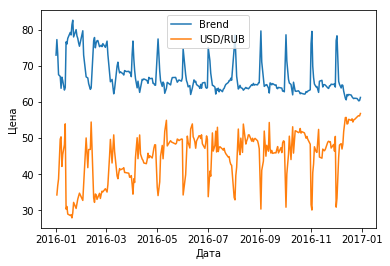

In [11]:
plt.plot(rub['Дата'], rub['Цена'])
plt.plot(brent['Дата'], brent['Цена'])
 
    
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend(['Brend', 'USD/RUB'])
plt.show()

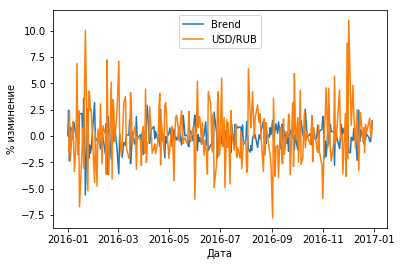

In [12]:
plt.plot(rub['Дата'], rub['Изм. %'])
plt.plot(brent['Дата'], brent['Изм. %'])
 
    
plt.xlabel('Дата')
plt.ylabel('% изминение')
plt.legend(['Brend', 'USD/RUB'])
plt.show()

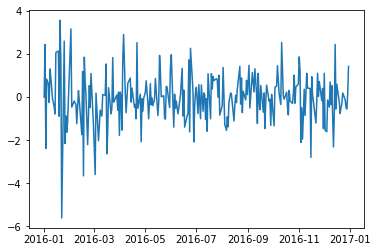

In [13]:
plt.plot(rub['Дата'], rub['Изм. %'])

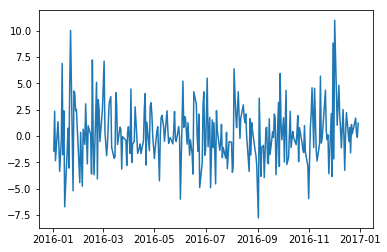

In [14]:
plt.plot(brent['Дата'], brent['Изм. %'])

## 4) 
найти коэффициент корреляции за период (начиная с нового года): 
 год
 6 мес
 3 мес

In [15]:
data = pd.DataFrame() #creates a new dataframe that's empty
rub['usd/rub'] = rub['Цена']
brent['brent'] = brent['Цена']
data = pd.concat([rub.set_index('Дата'),brent.set_index('Дата')], axis=1, join='inner').reset_index() 

In [16]:
data.head()

,Дата,index,Цена,Откр.,Макс.,Мин.,Изм. %,usd/rub,index,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,brent
0,2016-01-02,233,77.3094,"75,4644","77,4449","75,4273",2.44,77.3094,237,34.24,"35,85","36,25","33,92","331,87K",-1.44,34.24
1,2016-01-03,212,73.3731,"75,1682","75,1682","73,1891",-2.39,73.3731,216,36.81,"36,60","37,25","35,95","276,26K",2.34,36.81
2,2016-01-04,190,67.5855,"67,0288","68,3415","66,9732",0.83,67.5855,194,38.67,"40,14","40,43","38,55","286,17K",-2.35,38.67
3,2016-01-06,150,67.1015,"66,6968","67,3133","66,5300",0.61,67.1015,151,49.72,"49,65","50,00","48,65","266,00K",0.06,49.72
4,2016-01-07,129,63.8040,"63,9731","64,2542","63,8027",-0.26,63.8040,129,50.35,"49,90","50,66","49,25","248,69K",1.35,50.35


In [17]:
data[['usd/rub', 'brent']].corr()

,usd/rub,brent
usd/rub,1.000000,-0.940713
brent,-0.940713,1.000000


In [18]:
print ('Корреляция за 1 год :', data[['usd/rub', 'brent']].corr().brent[0])

Корреляция за 1 год : -0.940712869205


In [19]:
print ('Корреляция за полгода :', data[data['Дата'] < '2016-07-01'][['usd/rub', 'brent']].corr().brent[0]) 


Корреляция за полгода : -0.93512006676


In [20]:
print ('Корреляция за 3 месяца :', data[data['Дата'] < '2016-04-01'][['usd/rub', 'brent']].corr().brent[0]) 


Корреляция за 3 месяца : -0.930826237071


In [29]:
rub = pd.read_csv("usd2.csv", delimiter=';')
rub.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USD000UTSTOM,D,04/01/16,0,73.081,73.720,72.615,73.160,1557004000
1,USD000UTSTOM,D,05/01/16,0,72.990,73.550,72.823,73.316,969004000
2,USD000UTSTOM,D,06/01/16,0,73.318,75.100,73.264,74.760,1984001000
3,USD000UTSTOM,D,11/01/16,0,75.721,76.493,75.060,76.211,4952591000
4,USD000UTSTOM,D,12/01/16,0,77.000,77.244,75.901,77.065,5640143000


In [37]:
rub.dtypes

<TICKER>            object
<PER>               object
<DATE>              object
<TIME>               int64
<OPEN>             float64
<HIGH>             float64
<LOW>              float64
<CLOSE>            float64
<VOL>                int64
Дата        datetime64[ns]
dtype: object

In [36]:
rub['Дата'] = pd.to_datetime(rub['<DATE>'])


In [38]:
rub.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,Дата
0,USD000UTSTOM,D,04/01/16,0,73.081,73.720,72.615,73.160,1557004000,2016-04-01
1,USD000UTSTOM,D,05/01/16,0,72.990,73.550,72.823,73.316,969004000,2016-05-01
2,USD000UTSTOM,D,06/01/16,0,73.318,75.100,73.264,74.760,1984001000,2016-06-01
3,USD000UTSTOM,D,11/01/16,0,75.721,76.493,75.060,76.211,4952591000,2016-11-01
4,USD000UTSTOM,D,12/01/16,0,77.000,77.244,75.901,77.065,5640143000,2016-12-01
